In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

In [4]:
import imblearn

In [5]:
pip install imblearn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("Datasets/bitcoin_train.csv")

In [4]:
test = pd.read_csv("Datasets/bitcoin_test.csv")

In [5]:
test

,Unnamed: 0,address,year,day,length,weight,count,looped,neighbors,income
0,0,16r8CxcVCypUFzvHHZYttyiZtMaGnJn3te,2014,49,0,1.000000,1,0,2,1.000000e+09
1,1,12EK9jUdG3heM7AF6Abyp38yuNMHN4dcq1,2017,265,36,0.062500,1,0,2,1.301765e+09
2,2,16xUAFderxZwbEp9yuz4FdPnMVxTQntcwN,2017,44,0,1.000000,1,0,2,6.245187e+07
3,3,1JvUt1UUDey7JY7WYHNTBSUNuhq1Vkbdfd,2013,264,4,0.187500,2,0,2,2.079400e+08
4,4,138BLKDpeNyKdHnrLT6hZMW119sD4PZJ6D,2014,348,48,1.000000,1,0,2,1.013901e+10
...,...,...,...,...,...,...,...,...,...,...
583335,583335,123U8HgTRduGkP5A7W99WegVyibLNA7U1D,2016,220,0,1.000000,1,0,1,4.014037e+07
583336,583336,1DrPsCAohyjgsgeN377Ntym3Ch1xSRZyYw,2017,45,144,2.110181,6692,5382,8,3.375000e+08
583337,583337,1MKZQMPKfNiC2SyJSqSXZPmaYQVZnWnC7T,2011,23,36,1.000000,1,0,2,4.101000e+09
583338,583338,39fBLaBjEXS66yMfL4sTEjAko8ErpFV7pK,2017,321,2,0.250000,1,0,1,9.048924e+08


In [6]:
df

,Unnamed: 0,address,year,day,length,weight,count,looped,neighbors,income,label
0,0,1BpvJgUs7UprQu9z8fLsP7pFvFcCscHRCV,2011,287,2,0.250000,1,0,2,3.009500e+08,white
1,1,1EnSeTPjMxZm9X9iQDYmMUDoLQQ3ouDN6F,2015,77,0,1.000000,1,0,1,4.820000e+07,white
2,2,1mwkhYHeoqGBkVW84yFpYCSqRDt5TWSBQ,2011,164,52,0.000977,23,0,2,2.349582e+10,white
3,3,19XUCsxgpHZGXKLgVMpdoyZqcFdeM3pGeE,2014,86,144,0.000001,1555,1152,2,9.581274e+07,white
4,4,14Ef6MGSYLEbigo55CpPBGEGSGYwwB7xhY,2015,261,6,0.250000,1,0,2,3.424024e+07,white
...,...,...,...,...,...,...,...,...,...,...,...
2333352,2333352,1G4LMHcXfzzf3B5TrcYJXmSQx8o49Nm2qY,2011,314,10,0.062500,1,0,1,5.140488e+07,white
2333353,2333353,1NTVQDhQEuiu3LKEAat5vCZ5otfwFajd4a,2017,360,144,0.003251,6066,0,2,1.000000e+08,white
2333354,2333354,1AjhfWSg2VCEnRMuzH5ge1FfTamjqBE9hg,2017,160,20,0.002604,2,0,2,3.324864e+09,white
2333355,2333355,1BJd8jqJh9BgNKKFMg7U3NjxoiaHFKcLxe,2012,362,0,1.000000,1,0,2,1.045210e+09,white


In [7]:
df.dtypes

Unnamed: 0      int64
address        object
year            int64
day             int64
length          int64
weight        float64
count           int64
looped          int64
neighbors       int64
income        float64
label          object
dtype: object

In [8]:
df.describe()

,Unnamed: 0,year,day,length,weight,count,looped,neighbors,income
count,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06,2.333357e+06
mean,1.166678e+06,2.014476e+03,1.814778e+02,4.504554e+01,5.456381e-01,7.223780e+02,2.387287e+02,2.213161e+00,4.383004e+09
std,6.735823e+05,2.257312e+00,1.039893e+02,5.900348e+01,3.652788e+00,1.689861e+03,9.670131e+02,1.888230e+01,1.520211e+11
min,0.000000e+00,2.011000e+03,1.000000e+00,0.000000e+00,1.420108e-90,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,5.833390e+05,2.013000e+03,9.200000e+01,2.000000e+00,2.152083e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.434000e+07
50%,1.166678e+06,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,2.000000e+08
75%,1.750017e+06,2.016000e+03,2.710000e+02,1.080000e+02,8.794643e-01,5.700000e+01,0.000000e+00,2.000000e+00,9.940669e+08
max,2.333356e+06,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.982447e+13


In [9]:
df["label"].value_counts()

white                  2300268
CryptoWall                9872
CryptoLocker              7422
Cerber                    7381
Locky                     5320
CryptXXX                  1933
NoobCrypt                  388
DMALockerv3                290
DMALocker                  210
CryptoTorLocker2015         47
SamSam                      45
GlobeImposter               36
Globev3                     28
WannaCry                    24
Globe                       22
Razy                        13
APT                          8
KeRanger                     8
XTPLocker                    7
CryptConsole                 7
Flyper                       7
VenusLocker                  6
JigSaw                       4
XLockerv5.0                  4
EDA2                         3
Jigsaw                       1
Sam                          1
XLocker                      1
ComradeCircle                1
Name: label, dtype: int64

In [10]:
df.isnull().mean()

Unnamed: 0    0.0
address       0.0
year          0.0
day           0.0
length        0.0
weight        0.0
count         0.0
looped        0.0
neighbors     0.0
income        0.0
label         0.0
dtype: float64

In [11]:
df.isnull().values.any()

False

<BarContainer object of 2 artists>

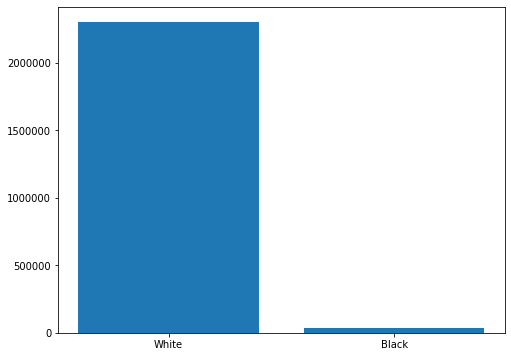

In [12]:
label_white = df['label'][df["label"] == 'white']
label_black = df['label'][df["label"] != 'white']

x_ax = ['White','Black']
y_ax = [len(label_white),len(label_black)]

plt.figure(figsize = (8,6))
plt.bar(x_ax,y_ax)

In [13]:
df.label.value_counts(normalize=True)*100

white                  98.581914
CryptoWall              0.423081
CryptoLocker            0.318082
Cerber                  0.316325
Locky                   0.227998
CryptXXX                0.082842
NoobCrypt               0.016628
DMALockerv3             0.012428
DMALocker               0.009000
CryptoTorLocker2015     0.002014
SamSam                  0.001929
GlobeImposter           0.001543
Globev3                 0.001200
WannaCry                0.001029
Globe                   0.000943
Razy                    0.000557
APT                     0.000343
KeRanger                0.000343
XTPLocker               0.000300
CryptConsole            0.000300
Flyper                  0.000300
VenusLocker             0.000257
JigSaw                  0.000171
XLockerv5.0             0.000171
EDA2                    0.000129
Jigsaw                  0.000043
Sam                     0.000043
XLocker                 0.000043
ComradeCircle           0.000043
Name: label, dtype: float64

In [14]:
df[df["label"] != "white"]

,Unnamed: 0,address,year,day,length,weight,count,looped,neighbors,income,label
79,79,1Nph7txvZfzPLCtdNGQN2RkTgY64QaBqpL,2014,74,2,1.166667,2,0,3,2.004500e+08,CryptoWall
161,161,1JNpTbXQNa1Bxf644c5fBQLHKLmXbkRRhA,2014,141,144,1.469787,962,961,6,5.460135e+08,CryptoWall
192,192,1PFeYcwJLxLA4hAVYmEykM4tSeozepWxNB,2017,18,144,0.065531,4342,0,2,1.000000e+08,Cerber
212,212,1DXzDxVPqP4WHwLGXn6bi8puSdVKDy2axf,2017,16,2,0.250000,1,0,2,8.000000e+07,Cerber
265,265,1Cc1AttnWEnsfqrCBY9KY8wPXkb2eLCNz8,2014,200,2,0.250000,2,0,2,5.625060e+07,CryptoWall
...,...,...,...,...,...,...,...,...,...,...,...
2332775,2332775,1BCRuRA9mgVuhSkLBgvVrgSP6MZ3ri9Xrt,2012,357,42,0.001465,2,0,2,1.122000e+08,CryptoLocker
2332969,2332969,13ivJyWPneQtz1Sf7gFNkrVUtJgU4TfL2X,2015,205,144,0.873724,1328,0,1,1.860000e+08,CryptoWall
2333164,2333164,16SB1s4fgqd8n12oJHX8VVJ3t6WZQPbQyh,2013,289,144,0.064866,1755,0,1,2.424783e+09,CryptoLocker
2333188,2333188,15kenyVEHy3fy8ZsVzNgXf79xkcRvrr5tx,2016,167,0,1.000000,1,0,2,1.917798e+08,Cerber


In [15]:

from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

scale_columns = ['length','weight','count','income']

df['length'] = rob_scaler.fit_transform(df['length'].values.reshape(-1,1))
df['weight'] = rob_scaler.fit_transform(df['weight'].values.reshape(-1,1))
df['count'] = rob_scaler.fit_transform(df['count'].values.reshape(-1,1))
df['income'] = rob_scaler.fit_transform(df['income'].values.reshape(-1,1))

test['length'] = rob_scaler.fit_transform(test['length'].values.reshape(-1,1))
test['weight'] = rob_scaler.fit_transform(test['weight'].values.reshape(-1,1))
test['count'] = rob_scaler.fit_transform(test['count'].values.reshape(-1,1))
test['income'] = rob_scaler.fit_transform(test['income'].values.reshape(-1,1))

In [16]:
df

,Unnamed: 0,address,year,day,length,weight,count,looped,neighbors,income,label
0,0,1BpvJgUs7UprQu9z8fLsP7pFvFcCscHRCV,2011,287,-0.056604,0.000000,0.000000,0,2,0.109761,white
1,1,1EnSeTPjMxZm9X9iQDYmMUDoLQQ3ouDN6F,2015,77,-0.075472,0.874183,0.000000,0,1,-0.165049,white
2,2,1mwkhYHeoqGBkVW84yFpYCSqRDt5TWSBQ,2011,164,0.415094,-0.290256,0.392857,0,2,25.329066,white
3,3,19XUCsxgpHZGXKLgVMpdoyZqcFdeM3pGeE,2014,86,1.283019,-0.291393,27.750000,1152,2,-0.113281,white
4,4,14Ef6MGSYLEbigo55CpPBGEGSGYwwB7xhY,2015,261,-0.018868,0.000000,0.000000,0,2,-0.180227,white
...,...,...,...,...,...,...,...,...,...,...,...
2333352,2333352,1G4LMHcXfzzf3B5TrcYJXmSQx8o49Nm2qY,2011,314,0.018868,-0.218546,0.000000,0,1,-0.161564,white
2333353,2333353,1NTVQDhQEuiu3LKEAat5vCZ5otfwFajd4a,2017,360,1.283019,-0.287606,108.303571,0,2,-0.108728,white
2333354,2333354,1AjhfWSg2VCEnRMuzH5ge1FfTamjqBE9hg,2017,160,0.113208,-0.288359,0.017857,0,2,3.397599,white
2333355,2333355,1BJd8jqJh9BgNKKFMg7U3NjxoiaHFKcLxe,2012,362,-0.075472,0.874183,0.000000,0,2,0.918979,white


In [17]:
test

,Unnamed: 0,address,year,day,length,weight,count,looped,neighbors,income
0,0,16r8CxcVCypUFzvHHZYttyiZtMaGnJn3te,2014,49,-0.076923,0.861158,0.000000,0,2,0.869728
1,1,12EK9jUdG3heM7AF6Abyp38yuNMHN4dcq1,2017,265,0.269231,-0.215290,0.000000,0,2,1.197792
2,2,16xUAFderxZwbEp9yuz4FdPnMVxTQntcwN,2017,44,-0.076923,0.861158,0.000000,0,2,-0.149524
3,3,1JvUt1UUDey7JY7WYHNTBSUNuhq1Vkbdfd,2013,264,-0.038462,-0.071763,0.018519,0,2,0.008643
4,4,138BLKDpeNyKdHnrLT6hZMW119sD4PZJ6D,2014,348,0.384615,0.861158,0.000000,0,2,10.805172
...,...,...,...,...,...,...,...,...,...,...
583335,583335,123U8HgTRduGkP5A7W99WegVyibLNA7U1D,2016,220,-0.076923,0.861158,0.000000,0,1,-0.173780
583336,583336,1DrPsCAohyjgsgeN377Ntym3Ch1xSRZyYw,2017,45,1.307692,2.135881,123.907407,5382,8,0.149494
583337,583337,1MKZQMPKfNiC2SyJSqSXZPmaYQVZnWnC7T,2011,23,0.269231,0.861158,0.000000,0,2,4.240971
583338,583338,39fBLaBjEXS66yMfL4sTEjAko8ErpFV7pK,2017,321,-0.057692,0.000000,0.000000,0,1,0.766332


In [18]:
#For normalization or standardization, normalization 'shifts' values to a range between 0 and 1, 
#while standardization does not bound its range, has zero mean, and is less prone to outliers. 
#In this dataset, there exists a lot of outliers, so standarization should be preferred.

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

df['looped'] = std_scaler.fit_transform(df['looped'].values.reshape(-1,1))
df['neighbors'] = std_scaler.fit_transform(df['neighbors'].values.reshape(-1,1))

test['looped'] = std_scaler.fit_transform(test['looped'].values.reshape(-1,1))
test['neighbors'] = std_scaler.fit_transform(test['neighbors'].values.reshape(-1,1))

In [19]:
df

,Unnamed: 0,address,year,day,length,weight,count,looped,neighbors,income,label
0,0,1BpvJgUs7UprQu9z8fLsP7pFvFcCscHRCV,2011,287,-0.056604,0.000000,0.000000,-0.246872,-0.011289,0.109761,white
1,1,1EnSeTPjMxZm9X9iQDYmMUDoLQQ3ouDN6F,2015,77,-0.075472,0.874183,0.000000,-0.246872,-0.064249,-0.165049,white
2,2,1mwkhYHeoqGBkVW84yFpYCSqRDt5TWSBQ,2011,164,0.415094,-0.290256,0.392857,-0.246872,-0.011289,25.329066,white
3,3,19XUCsxgpHZGXKLgVMpdoyZqcFdeM3pGeE,2014,86,1.283019,-0.291393,27.750000,0.944425,-0.011289,-0.113281,white
4,4,14Ef6MGSYLEbigo55CpPBGEGSGYwwB7xhY,2015,261,-0.018868,0.000000,0.000000,-0.246872,-0.011289,-0.180227,white
...,...,...,...,...,...,...,...,...,...,...,...
2333352,2333352,1G4LMHcXfzzf3B5TrcYJXmSQx8o49Nm2qY,2011,314,0.018868,-0.218546,0.000000,-0.246872,-0.064249,-0.161564,white
2333353,2333353,1NTVQDhQEuiu3LKEAat5vCZ5otfwFajd4a,2017,360,1.283019,-0.287606,108.303571,-0.246872,-0.011289,-0.108728,white
2333354,2333354,1AjhfWSg2VCEnRMuzH5ge1FfTamjqBE9hg,2017,160,0.113208,-0.288359,0.017857,-0.246872,-0.011289,3.397599,white
2333355,2333355,1BJd8jqJh9BgNKKFMg7U3NjxoiaHFKcLxe,2012,362,-0.075472,0.874183,0.000000,-0.246872,-0.011289,0.918979,white


In [20]:
test

,Unnamed: 0,address,year,day,length,weight,count,looped,neighbors,income
0,0,16r8CxcVCypUFzvHHZYttyiZtMaGnJn3te,2014,49,-0.076923,0.861158,0.000000,-0.246607,-0.013440,0.869728
1,1,12EK9jUdG3heM7AF6Abyp38yuNMHN4dcq1,2017,265,0.269231,-0.215290,0.000000,-0.246607,-0.013440,1.197792
2,2,16xUAFderxZwbEp9yuz4FdPnMVxTQntcwN,2017,44,-0.076923,0.861158,0.000000,-0.246607,-0.013440,-0.149524
3,3,1JvUt1UUDey7JY7WYHNTBSUNuhq1Vkbdfd,2013,264,-0.038462,-0.071763,0.018519,-0.246607,-0.013440,0.008643
4,4,138BLKDpeNyKdHnrLT6hZMW119sD4PZJ6D,2014,348,0.384615,0.861158,0.000000,-0.246607,-0.013440,10.805172
...,...,...,...,...,...,...,...,...,...,...
583335,583335,123U8HgTRduGkP5A7W99WegVyibLNA7U1D,2016,220,-0.076923,0.861158,0.000000,-0.246607,-0.088132,-0.173780
583336,583336,1DrPsCAohyjgsgeN377Ntym3Ch1xSRZyYw,2017,45,1.307692,2.135881,123.907407,5.338984,0.434714,0.149494
583337,583337,1MKZQMPKfNiC2SyJSqSXZPmaYQVZnWnC7T,2011,23,0.269231,0.861158,0.000000,-0.246607,-0.013440,4.240971
583338,583338,39fBLaBjEXS66yMfL4sTEjAko8ErpFV7pK,2017,321,-0.057692,0.000000,0.000000,-0.246607,-0.088132,0.766332


In [21]:
df['label_binary'] = df['label'].apply(lambda x: 0 if x == "white" else 1)

In [22]:
df["label_binary"].value_counts()

0    2300268
1      33089
Name: label_binary, dtype: int64

In [23]:
df['count'][df['label_binary'] == 1]

79          0.017857
161        17.160714
192        77.517857
212         0.000000
265         0.017857
             ...    
2332775     0.017857
2332969    23.696429
2333164    31.321429
2333188     0.000000
2333332     0.000000
Name: count, Length: 33089, dtype: float64

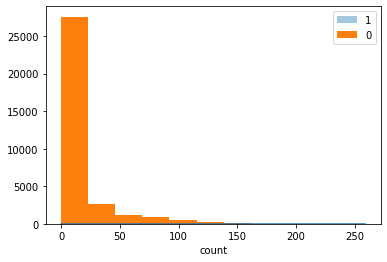

In [24]:
import seaborn as sns
sns.distplot(df['count'][df['label_binary'] == 0])
plt.hist(df['count'][df['label_binary'] == 1])
plt.legend(["1", "0"])

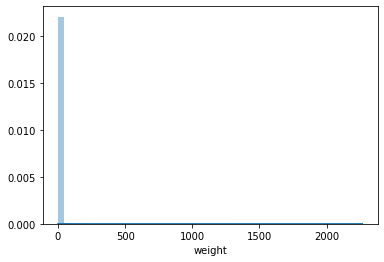

In [93]:
sns.distplot(df['weight'][df['label_binary'] == 0])

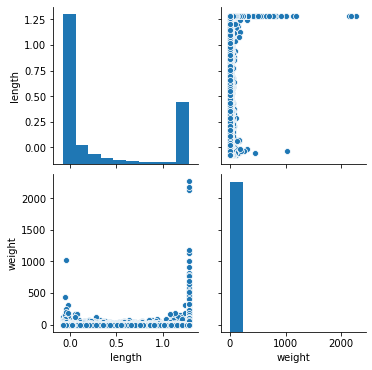

In [94]:
sns.pairplot(df[['length', 'weight']])

In [ ]:
scatter = pd.plotting.scatter_matrix(df[['length', 'weight', 'count', 'looped', 'neighbors', 'income','label']]
                                     , figsize=(15, 10))

In [25]:
df.corr()

,Unnamed: 0,year,day,length,weight,count,looped,neighbors,income,label_binary
Unnamed: 0,1.000000,-0.000628,-0.000788,0.000162,-0.000811,-0.000546,-0.000375,-0.000428,0.000427,0.001480
year,-0.000628,1.000000,-0.040177,0.163099,0.011937,0.285505,0.113284,-0.000737,-0.021016,0.021427
day,-0.000788,-0.040177,1.000000,0.011702,0.001197,-0.002774,0.002231,0.000167,0.001872,-0.008248
length,0.000162,0.163099,0.011702,1.000000,0.000609,0.703607,0.411402,0.030695,0.000861,-0.006875
weight,-0.000811,0.011937,0.001197,0.000609,1.000000,0.022553,0.061984,0.733636,0.080167,0.002732
count,-0.000546,0.285505,-0.002774,0.703607,0.022553,1.000000,0.560588,0.024922,-0.003539,-0.008663
looped,-0.000375,0.113284,0.002231,0.411402,0.061984,0.560588,1.000000,0.051599,0.003071,-0.017600
neighbors,-0.000428,-0.000737,0.000167,0.030695,0.733636,0.024922,0.051599,1.000000,0.157856,-0.000919
income,0.000427,-0.021016,0.001872,0.000861,0.080167,-0.003539,0.003071,0.157856,1.000000,-0.002835
label_binary,0.001480,0.021427,-0.008248,-0.006875,0.002732,-0.008663,-0.017600,-0.000919,-0.002835,1.000000


# **Binary Classification**

In [26]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [27]:
X = df[['length', 'weight', 'count', 'looped', 'neighbors', 'income']]
y = df['label_binary']

In [28]:
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.8)
X_over, y_over = over.fit_resample(X, y)
print(f"Oversampled: {Counter(y_over)}")
# now to comine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

Oversampled: Counter({0: 2300268, 1: 230026})
Combined Random Sampling: Counter({0: 287532, 1: 230026})


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combined_sampling, y_combined_sampling , test_size=0.2, random_state=10)

In [30]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [31]:

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Let's implement simple classifiers

classifiers = {
    #"LogisiticRegression": LogisticRegression(),
    "KNN Classifier": KNeighborsClassifier(),
    #"Support Vector Classifier": SVC(),
    #"DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

In [32]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_test, y_test, cv=5)

    print(key,":", round(training_score.mean(), 2) * 100, "%")

KNN Classifier : 72.0 %
RandomForestClassifier : 84.0 %


In [33]:
def train_RF(X, y):
    clf = RandomForestClassifier()
    clf.fit(X, y)
    return clf

In [34]:
model = train_RF(X_train, y_train)
training_score = cross_val_score(model, X_test, y_test, cv=5)
print(key,":", round(training_score.mean(), 2) * 100, "%")

RandomForestClassifier : 84.0 %


In [35]:
from sklearn.model_selection import cross_val_predict

pred = cross_val_predict(model, X_test, y_test, cv=5)

In [36]:
from sklearn.metrics import roc_auc_score

print('ROC Area Under Curve Score: ', roc_auc_score(y_test, pred))

ROC Area Under Curve Score:  0.8414229735072392


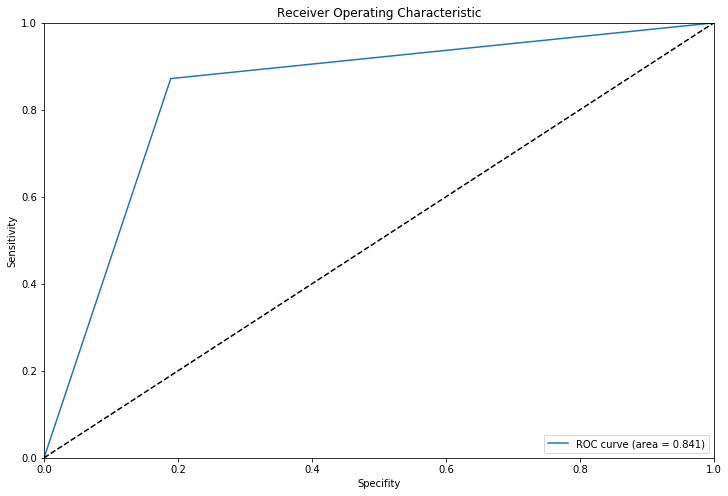

In [37]:

from sklearn.metrics import roc_curve

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, pred)

# Plot ROC curve
plt.figure(figsize = (12,8))

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, pred))
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Specifity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [38]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = pred

print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Recall Score: 0.87
Precision Score: 0.79
F1 Score: 0.83
Accuracy Score: 0.84


# **Mutli Class CLassification**

In [32]:
counts = df["label"].value_counts()

In [33]:
def overdown_sample(x):
    if x > 10000:
        return x/10
    if x > 1000:
        return x * 10
    if x > 100:
        return x * 100
    else:
        return x * 500

In [34]:
sample_values = []
for i in counts.values:
    sample_values.append(int(overdown_sample(i)))

In [35]:
sample_weights ={}
for i,j in enumerate(counts.index):
    sample_weights[j] = sample_values[i]

In [36]:
sample_weights

{'white': 230026,
 'CryptoWall': 98720,
 'CryptoLocker': 74220,
 'Cerber': 73810,
 'Locky': 53200,
 'CryptXXX': 19330,
 'NoobCrypt': 38800,
 'DMALockerv3': 29000,
 'DMALocker': 21000,
 'CryptoTorLocker2015': 23500,
 'SamSam': 22500,
 'GlobeImposter': 18000,
 'Globev3': 14000,
 'WannaCry': 12000,
 'Globe': 11000,
 'Razy': 6500,
 'KeRanger': 4000,
 'APT': 4000,
 'Flyper': 3500,
 'CryptConsole': 3500,
 'XTPLocker': 3500,
 'VenusLocker': 3000,
 'JigSaw': 2000,
 'XLockerv5.0': 2000,
 'EDA2': 1500,
 'ComradeCircle': 500,
 'Jigsaw': 500,
 'Sam': 500,
 'XLocker': 500}

In [37]:
sample_weights.pop("white")

230026

In [38]:
sample_weights

{'CryptoWall': 98720,
 'CryptoLocker': 74220,
 'Cerber': 73810,
 'Locky': 53200,
 'CryptXXX': 19330,
 'NoobCrypt': 38800,
 'DMALockerv3': 29000,
 'DMALocker': 21000,
 'CryptoTorLocker2015': 23500,
 'SamSam': 22500,
 'GlobeImposter': 18000,
 'Globev3': 14000,
 'WannaCry': 12000,
 'Globe': 11000,
 'Razy': 6500,
 'KeRanger': 4000,
 'APT': 4000,
 'Flyper': 3500,
 'CryptConsole': 3500,
 'XTPLocker': 3500,
 'VenusLocker': 3000,
 'JigSaw': 2000,
 'XLockerv5.0': 2000,
 'EDA2': 1500,
 'ComradeCircle': 500,
 'Jigsaw': 500,
 'Sam': 500,
 'XLocker': 500}

In [39]:
under_weights = {'white': 230026}

In [40]:
X = df[['length', 'weight', 'count', 'looped', 'neighbors', 'income']]
y = df['label']

In [97]:
over = RandomOverSampler(sample_weights)
under = RandomUnderSampler(under_weights)
X_over, y_over = over.fit_resample(X, y)
print(f"Oversampled: {Counter(y_over)}")
# now to comine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

/opt/anaconda3/lib/python3.7/site-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy={'CryptoWall': 98720, 'CryptoLocker': 74220, 'Cerber': 73810, 'Locky': 53200, 'CryptXXX': 19330, 'NoobCrypt': 38800, 'DMALockerv3': 29000, 'DMALocker': 21000, 'CryptoTorLocker2015': 23500, 'SamSam': 22500, 'GlobeImposter': 18000, 'Globev3': 14000, 'WannaCry': 12000, 'Globe': 11000, 'Razy': 6500, 'KeRanger': 4000, 'APT': 4000, 'Flyper': 3500, 'CryptConsole': 3500, 'XTPLocker': 3500, 'VenusLocker': 3000, 'JigSaw': 2000, 'XLockerv5.0': 2000, 'EDA2': 1500, 'ComradeCircle': 500, 'Jigsaw': 500, 'Sam': 500, 'XLocker': 500} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,
/opt/anaconda3/lib/python3.7/site-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy={'white': 230026} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


Oversampled: Counter({'white': 2300268, 'CryptoWall': 98720, 'CryptoLocker': 74220, 'Cerber': 73810, 'Locky': 53200, 'NoobCrypt': 38800, 'DMALockerv3': 29000, 'CryptoTorLocker2015': 23500, 'SamSam': 22500, 'DMALocker': 21000, 'CryptXXX': 19330, 'GlobeImposter': 18000, 'Globev3': 14000, 'WannaCry': 12000, 'Globe': 11000, 'Razy': 6500, 'KeRanger': 4000, 'APT': 4000, 'Flyper': 3500, 'CryptConsole': 3500, 'XTPLocker': 3500, 'VenusLocker': 3000, 'XLockerv5.0': 2000, 'JigSaw': 2000, 'EDA2': 1500, 'Sam': 500, 'XLocker': 500, 'Jigsaw': 500, 'ComradeCircle': 500})
Combined Random Sampling: Counter({'white': 230026, 'CryptoWall': 98720, 'CryptoLocker': 74220, 'Cerber': 73810, 'Locky': 53200, 'NoobCrypt': 38800, 'DMALockerv3': 29000, 'CryptoTorLocker2015': 23500, 'SamSam': 22500, 'DMALocker': 21000, 'CryptXXX': 19330, 'GlobeImposter': 18000, 'Globev3': 14000, 'WannaCry': 12000, 'Globe': 11000, 'Razy': 6500, 'APT': 4000, 'KeRanger': 4000, 'CryptConsole': 3500, 'Flyper': 3500, 'XTPLocker': 3500, 'V

# ****Model Evaluation****

In [98]:
#use all data in our train csv
X_train, X_test, y_train, y_test = train_test_split(X_combined_sampling, y_combined_sampling , test_size=0.2, random_state=10)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [99]:
def train_RF(X, y):
    #clf = RandomForestClassifier(bootstrap = True, max_depth = 110, max_features = 3, min_samples_split = 12, 
                                 #min_samples_leaf = 5, n_estimators = 1000)
    clf = RandomForestClassifier()
    clf.fit(X, y)
    return clf


In [100]:
model = train_RF(X_train, y_train)
training_score = cross_val_score(model, X_test, y_test, cv=5)
print(key,":", round(training_score.mean(), 2) * 100, "%")

RandomForestClassifier : 86.0 %


In [102]:
from sklearn.model_selection import cross_val_predict

pred = cross_val_predict(model, X_test, y_test, cv=5)

In [110]:
from sklearn.metrics import classification_report, precision_recall_fscore_support
print(classification_report(y_test, pred))

                     precision    recall  f1-score   support

                APT       0.95      1.00      0.97       845
             Cerber       0.79      0.89      0.84     14656
      ComradeCircle       1.00      1.00      1.00       101
       CryptConsole       0.97      1.00      0.99       723
           CryptXXX       0.93      0.95      0.94      3890
       CryptoLocker       0.76      0.77      0.77     14869
CryptoTorLocker2015       0.98      0.98      0.98      4764
         CryptoWall       0.79      0.83      0.81     19571
          DMALocker       0.94      0.96      0.95      4269
        DMALockerv3       0.90      0.95      0.92      5872
               EDA2       0.99      1.00      1.00       302
             Flyper       0.99      1.00      1.00       658
              Globe       0.95      1.00      0.97      2218
      GlobeImposter       0.99      0.97      0.98      3546
            Globev3       0.87      0.87      0.87      2773
             JigSaw    

# **For prediting labels in q5**

In [52]:
#use all data in our train csv
X_train = X_combined_sampling
y_train = y_combined_sampling
X_train = X_train.values
X_test = test[['length', 'weight', 'count', 'looped', 'neighbors', 'income']]
X_test = X_test.values
y_train = y_train.values
#y_test = y_test.values

In [43]:
classifiers = {
    #"LogisiticRegression": LogisticRegression(),
    "KNN Classifier": KNeighborsClassifier(),
    #"Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

In [44]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_test, y_test, cv=5)

    print(key,":", round(training_score.mean(), 2) * 100, "%")

KNN Classifier : 70.0 %
DecisionTreeClassifier : 84.0 %
RandomForestClassifier : 86.0 %


In [57]:

# Pick the best classifier RandomForestClassifier and tuning hpyerparameter

from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, 
                          cv = 5, n_jobs = 5, verbose = 2)

grid_search.fit(X_train, y_train)

rf_clf = grid_search.best_estimator_



"\n# Pick the best classifier RandomForestClassifier and tuning hpyerparameter\n\nfrom sklearn.model_selection import GridSearchCV\nparam_grid = {\n    'bootstrap': [True],\n    'max_depth': [80, 90, 100, 110],\n    'max_features': [2, 3],\n    'min_samples_leaf': [3, 4, 5],\n    'min_samples_split': [8, 10, 12],\n    'n_estimators': [100, 200, 300, 1000]\n}\ngrid_search = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, \n                          cv = 5, n_jobs = 5, verbose = 2)\n\ngrid_search.fit(X_train, y_train)\n\nrf_clf = grid_search.best_estimator_\n"

In [58]:
def train_RF(X, y):
    #clf = RandomForestClassifier(bootstrap = True, max_depth = 110, max_features = 3, min_samples_split = 12, 
                                 #min_samples_leaf = 5, n_estimators = 1000)
    clf = RandomForestClassifier()
    clf.fit(X, y)
    return clf


In [60]:
model = train_RF(X_train, y_train)
#training_score = cross_val_score(model, X_test, y_test, cv=5)
#print(key,":", round(training_score.mean(), 2) * 100, "%")

In [56]:
# max_feature = 2 :80%
# max_feature = 3 :81%
# n_estimaters from 81%

In [61]:
pred_test = model.predict(X_test)

In [62]:
pred_test

array(['CryptoWall', 'white', 'white', ..., 'white', 'white', 'white'],
      dtype=object)

In [64]:
test['label'] = pred_test

In [65]:
test

,Unnamed: 0,address,year,day,length,weight,count,looped,neighbors,income,label
0,0,16r8CxcVCypUFzvHHZYttyiZtMaGnJn3te,2014,49,-0.076923,0.861158,0.000000,-0.246607,-0.013440,0.869728,CryptoWall
1,1,12EK9jUdG3heM7AF6Abyp38yuNMHN4dcq1,2017,265,0.269231,-0.215290,0.000000,-0.246607,-0.013440,1.197792,white
2,2,16xUAFderxZwbEp9yuz4FdPnMVxTQntcwN,2017,44,-0.076923,0.861158,0.000000,-0.246607,-0.013440,-0.149524,white
3,3,1JvUt1UUDey7JY7WYHNTBSUNuhq1Vkbdfd,2013,264,-0.038462,-0.071763,0.018519,-0.246607,-0.013440,0.008643,white
4,4,138BLKDpeNyKdHnrLT6hZMW119sD4PZJ6D,2014,348,0.384615,0.861158,0.000000,-0.246607,-0.013440,10.805172,white
...,...,...,...,...,...,...,...,...,...,...,...
583335,583335,123U8HgTRduGkP5A7W99WegVyibLNA7U1D,2016,220,-0.076923,0.861158,0.000000,-0.246607,-0.088132,-0.173780,white
583336,583336,1DrPsCAohyjgsgeN377Ntym3Ch1xSRZyYw,2017,45,1.307692,2.135881,123.907407,5.338984,0.434714,0.149494,white
583337,583337,1MKZQMPKfNiC2SyJSqSXZPmaYQVZnWnC7T,2011,23,0.269231,0.861158,0.000000,-0.246607,-0.013440,4.240971,white
583338,583338,39fBLaBjEXS66yMfL4sTEjAko8ErpFV7pK,2017,321,-0.057692,0.000000,0.000000,-0.246607,-0.088132,0.766332,white
